# ProbStats Lab3 -- HT week 5

The problems in Laboratory 3 (week 5) for Probability and Statistics focus on exponential distributions and types of statistical errors. Use this empty notebook to complete portions of the lab that require the Math, NumPy, SciPy, Matplotlib, and other Python libraries. I've loaded a few libraries to get you started.  


In [3]:
# Import Math, NumPy, SciPy, and Matplotlib
import math as m
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 


# Q1

Common parent-daughter pairs used in dating geological events include 235Ur→207Pb (T1/2 = 700 Ma),
238Ur→206Pb (T1/2 = 4.5 Ga), 40K→40Ar (T1/2 = 1.3 Ga), 87Rb→87Sr (T1/2 = 50 Ga). Pairings with shorter halflifes, such as 234Ur→230Th (T1/2 = 34 ka) and 14C→12C (T1/2 = 5.7 ka) are useful for the dating of younger
samples. Other radionuclides have much higher decay rates, with half lives on the order of hours or minutes.
The time scales differ from familiar geological examples, but the maths are the same.
Consider the β decay of 90Y→90Zr. You record that the relative abundances of 90Y and 90Zr in your sample are
39.5% and 60.5%, respectively. You return to the lab and measure the composition of your sample exactly 24
hours later, to find that the values are now 30.47% and 69.53%.

## Q1a

The exponential distribution describes, among other things, the waiting time to decay for individual
atoms. This should seem logical to you, given that the exponential is the continuous analogue of the
geometric distribution, which describes the waiting time (in number of discrete trials) until an event
that is equally likely to happen in any given trial. Using words, diagrams, or expressions, explain why
the exponential can also be used to describe the number of undecayed particles remaining in a sample.

## Q1b

Beginning with the probability density function for the exponential distribution, derive a general
expression relating the number of particles in a sample at the beginning of an experiment, N0, to those
remaining after some time t, Nt. (This derivation requires you to work with an ordinary differential
equation, so you may wish to review your notes from maths in Michaelmas Term!)

## Q1c

Using your expression, calculate the decay rate λ and the half-life for 90Y→90Zr.

## Q1d

Produce a graph showing the relative percentage of 90Y remaining in your sample as time progresses.
This graph should begin at the point where your experiment commenced (i.e., when the sample as
39.5% 90Y), and continue to the point at which 80 percent of that original amount has decayed to the
daughter 90Zr. Be sure that your plot is appropriately labelled. Hint: recall how we plotted graphs in
the first lab exercise if you are having troubles here. You will want to calculate values of the y variable
for very many, equally spaced values of the x variable in order to generate a smooth curve.

## Q1e

What is the expected waiting time for an individual 90Y atom to decay to 90Zr? If you monitored a
single atom selected at the beginning of your experiment, what is the probability that it will decay at
a time between 24 and 36 hours after the trial commenced?

## 1a

This can be seen in equation
$ N(t) = N_0 e^{-\lambda t} $
where
$N_0$ is the initial number of undecayed particles at time $t=0$,
t is the time, and 
e is the base of the natural logarithm

## 1b

Starting with the rate of change of the number of particles, $\frac{dN}{dt} = -\lambda N$,


$$
\frac{dN}{dt} = -\lambda N
$$


$$
\frac{dN}{N} = -\lambda dt
$$

Integrating both sides from $0$ to $t$:
$$
\int_{N_0}^{N(t)} \frac{dN}{N} = -\lambda \int_0^t dt
$$

$$
\ln|N(t)| - \ln|N_0| = -\lambda t - 0
$$


$$
\ln\left(\frac{N(t)}{N_0}\right) = -\lambda t
$$


$$
e^{\ln\left(\frac{N(t)}{N_0}\right)} = e^{-\lambda t}
$$

$$
\frac{N(t)}{N_0} = e^{-\lambda t}
$$

Solving for $N(t)$:
$$
N(t) = N_0 e^{-\lambda t}
$$

I do not know how to go from $f(x) = \lambda e^{-\lambda x}$


## 1c

Given

Initial abundance 90Y=39.5

Final abundance 90Y=30.47

Time=24 hours

$ \lambda = -\frac{\ln{\left(\frac{30.47}{39.5}\right)}}{1} $

$ \lambda = -\frac{\ln{0.7708}}{1} $

$ \lambda = -(-0.2599) $

$ \lambda = 0.2599 $

$ T_{1/2} = \frac{\ln{2}}{0.2599} $

$ T_{1/2} = \frac{0.6931}{0.2599} $

$ T_{1/2} = 2.6685 \text{ days} $


## 1d

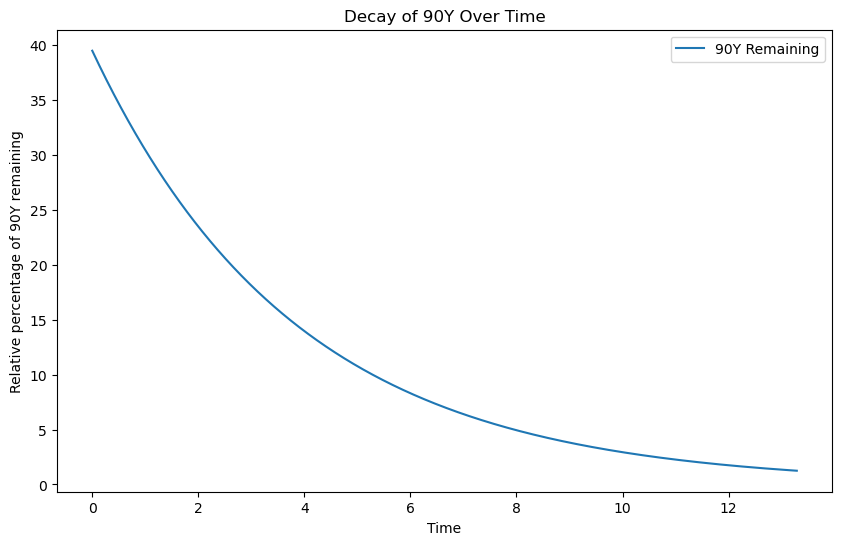

In [7]:
N0 = 39.5 
lambda_ = 0.2599  
t_80 = np.log((80*N0)/100) / (lambda_)  


t_points = np.linspace(0, t_80, 10000)


N_t = N0 * np.exp(-lambda_ * t_points)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(t_points, N_t, label='90Y Remaining')
plt.xlabel('Time')
plt.ylabel('Relative percentage of 90Y remaining')
plt.title('Decay of 90Y Over Time')
plt.legend()
plt.show()

## 1e

Expected time

$T = \frac{1}{\lambda}$

$T = \frac{1}{0.2599} = 3.847$ days


CDF

$F(t) = 1 - e^{-\lambda t}$

$F(36)-F(24) = 1 - e^{-(0.2599)(36)}-(1 - e^{-(0.2599)(24)})=0.001868$


# Q2

In this problem, we’ll review type I error using an example from the mining industry. Kimberlite is an
igneous rock, sourced from deep within the mantle, that is most commonly found in vertical intrusions known
as pipes. Scientifically interesting due to the information they yield concerning mantle composition at great
depth, kimberlite pipes are also economically significant because of the diamond xenocrysts they contain.
Suppose that over many years, the processing of 11,363 tonnes of source rock from an actively mined
kimberlite pipe has yielded a total of 6,738 gem-grade diamonds.

## Q2a

What is the most appropriate distribution for describing the number of gem-grade diamonds in a
sample of rock from the kimberlite pipe? Justify your response.

## Q2b

Generate a histogram showing the probability of X diamonds per sample of 50 tonnes of rock, on the
range 0 ≤ X ≤ 65 diamonds.

## Q2c

You wish to compare the yield from a 50-tonne sample taken from a newly discovered kimberlite pipe
to the output from your established mine. Using the appropriate SciPy cumulative density function,
find approximate critical values for exploring the following hypotheses: (H1) the newly discovered
pipe has a different density of diamonds from the established mine; (H2) the newly discovered pipe
has a higher density of diamonds than the established mine; (H3) the newly discovered pipe has a
lower density of diamonds than the established mine. Calculate these at both the α = 0.05 and α = 0.10
levels. What are the null hypotheses for which H1 – H3 represent alternatives?

## Q2d

Which of the tests outlined above are two tailed? One tailed? Augment your written answer with a
sketch explaining your response.

## Q2e

Twenty 50-tonne samples are excavated from your established mine. Using the appropriate SciPy
function and the parameter(s) you have estimated for the previous problems, simulate the number of
diamonds that each yields.

## Q2f

Inspect your data visually. For how many would you reject the null hypothesis in favor of the
alternatives given in (c) at the α = 0.05 level? The α = 0.10 level? Present your tallies in a table,
composed in a word processor, with three rows (representing H1 – H3) and two columns (representing
α = 0.05 and α = 0.10).

## Q2g

Derive a general expression that gives the probability of at least one case of type I error at an arbitrary
α level in a series of n tests where the null is true. 

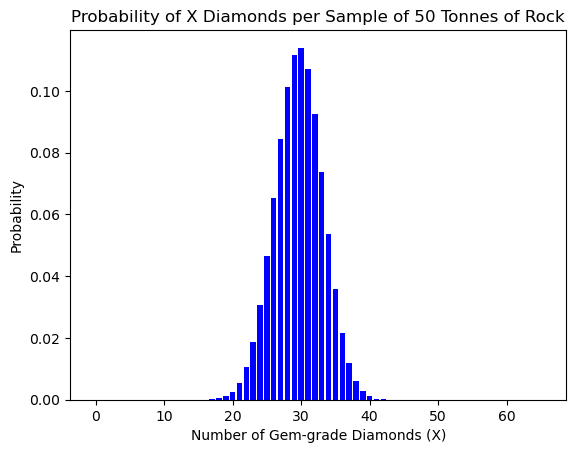

In [5]:
#Q2b
#Using scipy for binom

total_rock_tonnes = 11363
gem_diamonds = 6738 
sample_tonnes = 50 
num_samples = total_rock_tonnes / sample_tonnes

p = gem_diamonds / total_rock_tonnes


X = np.arange(0, 66)  
n = sample_tonnes
binomial_dist = sc.stats.binom(n, p)
 
probability_X = binomial_dist.pmf(X)


plt.bar(X, probability_X, width=0.8, color='blue')
plt.xlabel('Number of Gem-grade Diamonds (X)')
plt.ylabel('Probability')
plt.title('Probability of X Diamonds per Sample of 50 Tonnes of Rock')
plt.show()


In [10]:
#Q2c
#I spent a lot of time on this, I'm not sure i understand what i'm actually supposed to do, so i tried to do a z-test
""""
H1: The newly discovered pipe has a DIFFERENT density of diamonds from the established mine.
H0: Density of diamonds in the new pipe sample is the same as the density of diamonds in established sample.

H2: The newly discovered pipe has a HIGHER density of diamonds than the established mine.
H0: Density of diamonds in the new pipe sample is less than or equal to the density of diamonds in established sample.

H3: The newly discovered pipe has a LOWER density of diamonds than the established mine.
H0: Density of diamonds in the new pipe sample is greater than or equal to the density of diamonds in established sample.
"""

n1 = 11363  
n2 = 50     
x1 = 6738  


p0  = x1 / n1



SE = np.sqrt(p0 * (1 - p0) / n1 + p0 * (1 - p0) / n2)


alpha_values = [0.05, 0.10]

for alpha in alpha_values:
    
    z_alpha = sc.stats.norm.ppf(1 - alpha / 2)
    
    
    margin_of_error = z_alpha * SE
    
    
    critical_value_lower = p_null - margin_of_error
    critical_value_upper = p_null + margin_of_error
    
   
    print(f"Critical values for alpha = {alpha}:")
    print(f"\tH1: {critical_value_lower:.4f} to {critical_value_upper:.4f}(two-tailed test)")
    print(f"\tH2: {critical_value_upper:.4f} (one-tailed test)")
    print(f"\tH3: {critical_value_lower:.4f} (one-tailed test)")
    


Critical values for alpha = 0.05:
	H1: 0.4565 to 0.7294(two-tailed test)
	H2: 0.7294 (one-tailed test)
	H3: 0.4565 (one-tailed test)
Critical values for alpha = 0.1:
	H1: 0.4784 to 0.7075(two-tailed test)
	H2: 0.7075 (one-tailed test)
	H3: 0.4784 (one-tailed test)


In [12]:
#Q2e

n_simulations = 20  
sample_size = 50    
p1 = 6738 / 11363   

diamonds_per_sample = sc.stats.binom.rvs(sample_size, p1, n_simulations)

print("Simulated number of diamonds excavated from each sample:",diamonds_per_sample)


Simulated number of diamonds excavated from each sample: 48


In [5]:
#Q2f
At this point my friend informed me that this should be a Poisson Distribution , and now I don't know what to think. i AM SORRY